In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cluster_model import ClusterModel
from datetime import timedelta
import pickle
import seaborn as sns

In [3]:
with open('../data/station_data/2024 model/v2/tph_4/data.pickle', 'rb') as f:
    station_data = pickle.load(f)

In [4]:
cluster_model = ClusterModel(station_data=station_data, in_transit=[], tph=4)
horizontal_squares, vertical_squares, clusters = cluster_model.cluster_stations(0.004)
cluster_model.init_clusters()
cluster_model.init_state(path='../data/station_data/status_at_time/2024_6_20_2:19.csv', time=timedelta(hours=2))
# cluster_model.show_bikes()

# num_stations = [len(cluster) for cluster in clusters]
# sns.heatmap(np.array(num_stations).reshape((vertical_squares, horizontal_squares)))

45 horizontal squares and 64 vertical squares. Total squares: 2880


2:15:00
44 in transit
88 failures
47 critical failures
0 total trips
-------------------
2:30:00
57 in transit
141 failures
60 critical failures
44 total trips
-------------------
2:45:00
59 in transit
193 failures
71 critical failures
101 total trips
-------------------
3:00:00
63 in transit
222 failures
76 critical failures
160 total trips
-------------------
3:15:00
51 in transit
246 failures
77 critical failures
223 total trips
-------------------
3:30:00
52 in transit
279 failures
82 critical failures
274 total trips
-------------------
3:45:00
53 in transit
296 failures
85 critical failures
326 total trips
-------------------
4:00:00
47 in transit
320 failures
89 critical failures
379 total trips
-------------------
4:15:00
59 in transit
342 failures
94 critical failures
426 total trips
-------------------
4:30:00
62 in transit
366 failures
98 critical failures
485 total trips
-------------------
4:45:00
78 in transit
398 failures
103 critical failures
547 total trips
-----------

0

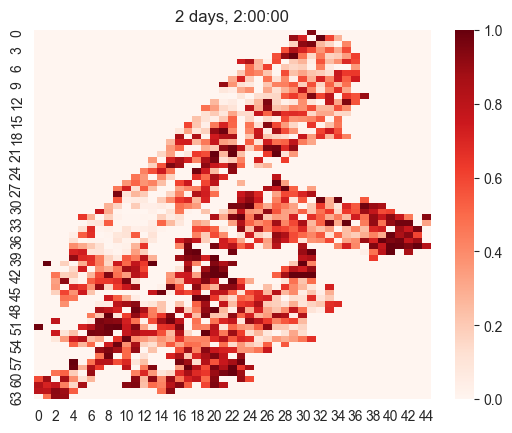

In [5]:
end_time = cluster_model.curr_time + timedelta(hours=48)
image_number = 0
while cluster_model.curr_time < end_time:
    cluster_model.sim()
    print(cluster_model.curr_time)
    print(len(cluster_model.in_transit), 'in transit')
    print(cluster_model.failures, 'failures')
    print(cluster_model.critical_failures, 'critical failures')
    print(cluster_model.total_trips, 'total trips')
    print('-------------------')
    if image_number < 10:
        t = f'000{image_number}'
    elif image_number < 100:
        t = f'00{image_number}'
    elif image_number < 1000:
        t = f'0{image_number}'
    else:
        t = f'{image_number}'
    # cluster_model.show_bikes(save=True, name=f'{t}')
    cluster_model.show_fill_percent(save=True, name=f'{t}')
    image_number += 1
    
# os.system('magick images/bikes/*.png bikes.gif')
os.system('magick images/fill/*.png fill.gif')


In [28]:
cluster_model.sim()
print(cluster_model.curr_time)
print(len(cluster_model.in_transit))
print(cluster_model.failures)
print(cluster_model.critical_failures)

13:45:00
1435
986
37
